<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Random Forest and XGboost <br>
<font color=696880 size=4>
    Bahar Oveisgharan (bahar.oveis.2000@gmail.com) <br>
    Ghazal Farahani (farahaniqazal@gmail.com)

____


### Breasr Cancer
Most of us know someone who struggled with breast cancer, or at least heard about the struggles facing patients who are fighting against breast cancer.The most important part of a process of clinical decision-making in patients with cancers, in general, is the accurate estimation of prognosis and survival duration. Breast cancer patients with the same stage of the disease and the same clinical characteristics can have different treatment responses and overall survival.
In this practical assignment, you are going to train a Random Forest and XGBoost model on <code>breast_cancer.csv</code> dataset.

Import all the libraries you may need here

In [ ]:
import pandas as pd


#### Loading the Data

In [ ]:
df = pd.read_csv('/content/breast_cancer.csv')

df.head()

,Unnamed: 0,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
0,0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,10.0,5.697687,6.044,IDC,Negative,1,ER-/HER2-,22.0,2.0,1
1,1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0.0,2.000000,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
2,2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,1.0,2.000000,4.030,IDC,Positive,0,NaN,15.0,2.0,0
3,3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,3.0,1.000000,4.050,MDLC,Positive,1,NaN,25.0,2.0,1
4,4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,8.0,2.000000,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0


### Data Exploration
#### Let's start off by exploring the files we just imported. it's not necessary to do any visualization just a statistical summary of the data would be enough. split your data to train and test.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type_detailed            1889 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1904 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

In [ ]:
print('-'*35 + 'shape of the data' + '-'*35)
print(df.shape)
print('-'*35 + 'describe of the data' + '-'*35)
print(df.describe())
print('-'*35 + 'NaN values' + '-'*35)
print(df.isnull().sum())
print('-'*35 + 'Cols type' + '-'*35)
print(df.dtypes)

-----------------------------------shape of the data-----------------------------------
(1904, 28)
-----------------------------------describe of the data-----------------------------------
        Unnamed: 0  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean    951.500000         61.087054      0.207983     2.643908   
std     549.781775         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     475.750000         51.375000      0.000000     1.000000   
50%     951.500000         61.770000      0.000000     3.000000   
75%    1427.250000         70.592500      0.000000     3.000000   
max    1903.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1904.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.638185         0.4863

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,...,10.0,5.697687,6.044,IDC,Negative,1,ER-/HER2-,22.0,2.0,1
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,...,0.0,2.000000,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,...,1.0,2.000000,4.030,IDC,Positive,0,NaN,15.0,2.0,0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,...,3.0,1.000000,4.050,MDLC,Positive,1,NaN,25.0,2.0,1
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,...,8.0,2.000000,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0


In [ ]:
df.dropna(inplace=True)
df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,...,0.0,2.0,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,...,8.0,2.0,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0
5,78.77,MASTECTOMY,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,Positive,3.0,...,0.0,4.0,4.062,IDC,Positive,1,ER+/HER2- High Prolif,31.0,4.0,0
8,86.41,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,Positive,3.0,...,1.0,4.0,5.032,IDC,Negative,1,ER+/HER2- High Prolif,16.0,2.0,0
9,84.22,MASTECTOMY,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,Positive,2.0,...,0.0,5.0,3.056,ILC,Negative,0,ER+/HER2- High Prolif,28.0,2.0,0


In [ ]:
y = df.overall_survival
X = df.drop('overall_survival', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

### Data Preparation
#### Creating two custom transformers to put on our pipeline:
* To split the data into categorical and numerical features and
* To preprocess the categorical features.
* Create the X feature matrix and the y target vector.
* split the data.

In [ ]:
numerical_features = list(df.select_dtypes(include=['float64', 'int64']).columns)
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features

['type_of_breast_surgery',
 'cancer_type_detailed',
 'cellularity',
 'pam50_+_claudin-low_subtype',
 'er_status_measured_by_ihc',
 'er_status',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'oncotree_code',
 'pr_status',
 '3-gene_classifier_subtype']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df[categorical_features] = OrdinalEncoder().fit_transform(df[categorical_features])

df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
1,43.19,0.0,1.0,0.0,0,2.0,1.0,1.0,1.0,3.0,...,0.0,2.0,4.020,1.0,1.0,1,0.0,10.0,1.0,1
4,76.97,1.0,4.0,0.0,1,3.0,1.0,1.0,1.0,3.0,...,8.0,2.0,6.080,4.0,1.0,1,0.0,40.0,2.0,0
5,78.77,1.0,1.0,2.0,0,3.0,1.0,1.0,1.0,3.0,...,0.0,4.0,4.062,1.0,1.0,1,0.0,31.0,4.0,0
8,86.41,0.0,1.0,2.0,0,3.0,1.0,1.0,1.0,3.0,...,1.0,4.0,5.032,1.0,0.0,1,0.0,16.0,2.0,0
9,84.22,1.0,2.0,0.0,0,1.0,1.0,0.0,1.0,2.0,...,0.0,5.0,3.056,2.0,0.0,0,0.0,28.0,2.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df.overall_survival
X = df.drop('overall_survival', axis=1)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Implementing two different models

## Random Forest

### train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 1)
RandomForest.fit(X_train, y_train)


y_pred = RandomForest.predict(X_test)
y_pred_train = RandomForest.predict(X_train)

### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('-'*35 + 'train' + '-'*35)
print(classification_report(y_pred_train, y_train))
print(f"accuracy : {accuracy_score(y_pred_train, y_train)}")
print('-'*35 + 'test' + '-'*35)
print(classification_report(y_pred, y_test))
print(f"accuracy : {accuracy_score(y_pred, y_test)}")

-----------------------------------train-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       482

    accuracy                           1.00      1140
   macro avg       1.00      1.00      1.00      1140
weighted avg       1.00      1.00      1.00      1140

accuracy : 1.0
-----------------------------------test-----------------------------------
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       229
           1       0.63      0.74      0.68       151

    accuracy                           0.72       380
   macro avg       0.72      0.73      0.72       380
weighted avg       0.74      0.72      0.73       380

accuracy : 0.7236842105263158


### Hyperparameter tuning :
#### Randomized Search Cross Validation and Grid Search Cross Validation
report best hyperparameters in each part.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

grid_param = { 'bootstrap': [True, False],
               'n_estimators': [int(x) for x in np.linspace(00, 2000, 10)],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
RandomForest_ht = RandomizedSearchCV(estimator = RandomForest, param_distributions = grid_param , n_iter = 20, cv = 2, verbose = 2, random_state = 42, n_jobs = -1)

RandomForest_ht.fit(X_train, y_train)
print(f'best hyperparameters in each part: {RandomForest_ht.best_params_}')

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

best hyperparameters in each part: {'n_estimators': 222, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [ ]:
model2 = RandomForestClassifier(n_estimators = 222, criterion = 'entropy', min_samples_split= 10, min_samples_leaf= 1, max_features= None, max_depth= 70, bootstrap= False, random_state = 0)
y_pred_model2 = RandomForest_ht.predict(X_test)

print(classification_report(y_pred_model2, y_test))
print(f"accuracy : {accuracy_score(y_pred_model2, y_test)}")

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       224
           1       0.66      0.74      0.70       156

    accuracy                           0.74       380
   macro avg       0.73      0.74      0.73       380
weighted avg       0.74      0.74      0.74       380

accuracy : 0.7368421052631579


### Find important features with Random Forest model
#### Visualize feature scores of the features

In [ ]:
important_features = RandomForest.feature_importances_
important_features

array([0.18035213, 0.01969382, 0.01502477, 0.02707595, 0.01025541,
       0.04280268, 0.05938637, 0.00745753, 0.00911004, 0.02879997,
       0.02204579, 0.007684  , 0.01870687, 0.01663787, 0.01547149,
       0.05927228, 0.02149687, 0.05235381, 0.08094995, 0.09747688,
       0.01294155, 0.01733542, 0.01788401, 0.0313059 , 0.09670636,
       0.0317723 ])

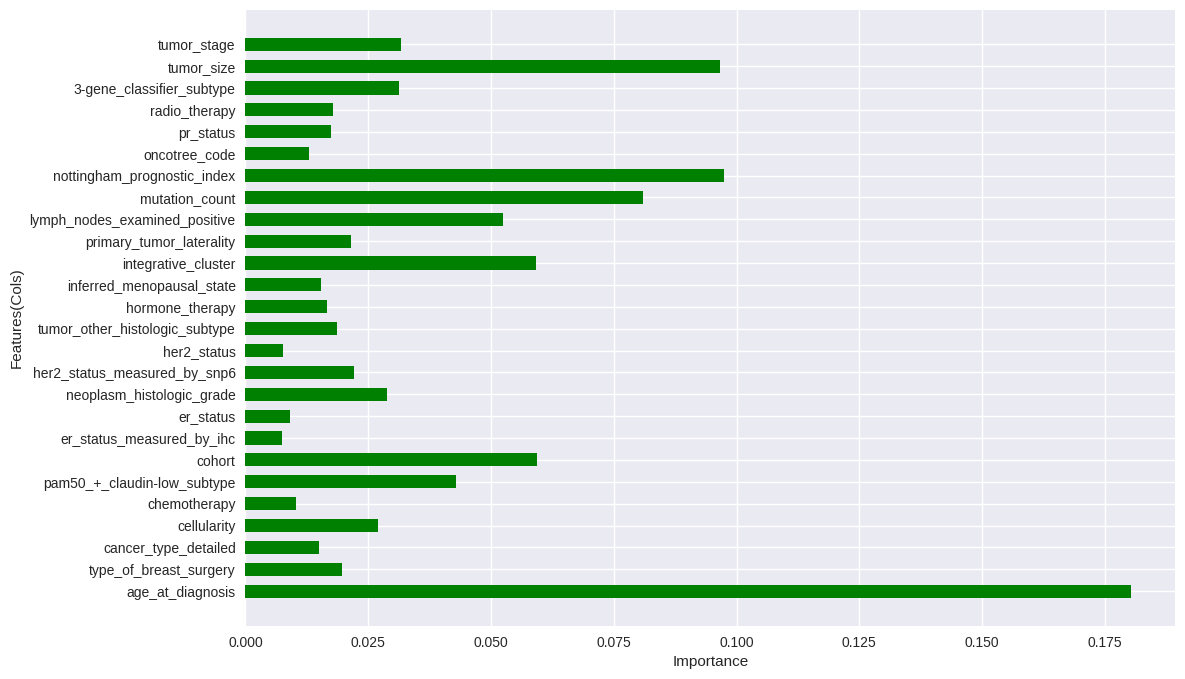

In [ ]:
import matplotlib.pyplot as plt

cols = df.columns
featuresimportance = list(zip(cols, important_features))

fig = plt.figure(figsize=(12, 8))

plt.barh([x[0] for x in featuresimportance],[x[1] for x in featuresimportance], height=0.6, color = 'green')
plt.xlabel("Importance")
plt.ylabel("Features(Cols)")

plt.show()

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. implement it and compare the results.

In [ ]:
# NOW WE CAN Build the Random Forest model on selected features and drop least important features.

X2 = df.drop(['er_status_measured_by_ihc', 'er_status', 'overall_survival'], axis=1)
y2 = df['overall_survival']
#X2 = df.drop('overall_survival', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 1)

In [ ]:
RandomForest2 = RandomForestClassifier(random_state=0)
RandomForest2.fit(X_train, y_train)
y_pred2 = RandomForest2.predict(X_test)

print(classification_report(y_pred2, y_test))
print(f"accuracy : {accuracy_score(y_pred2, y_test)}")

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       234
           1       0.62      0.75      0.68       146

    accuracy                           0.73       380
   macro avg       0.72      0.74      0.73       380
weighted avg       0.75      0.73      0.73       380

accuracy : 0.7315789473684211


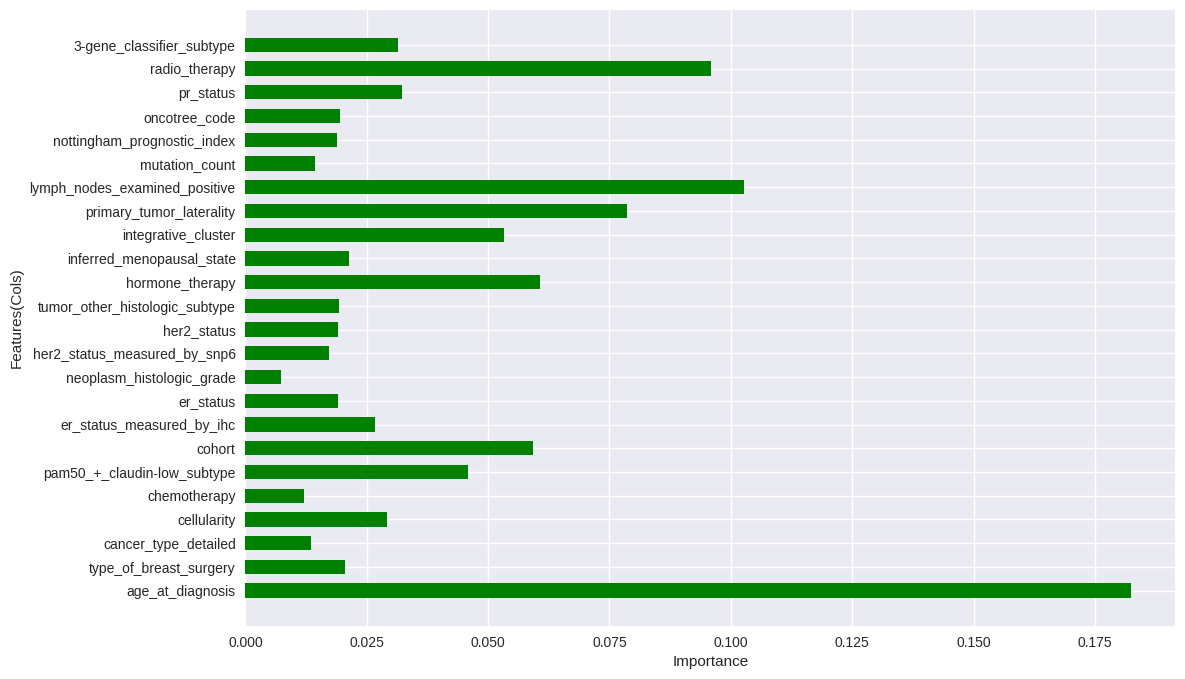

In [ ]:
important_features = RandomForest2.feature_importances_

cols = df.columns
featuresimportance = list(zip(cols, important_features))

fig = plt.figure(figsize=(12, 8))

plt.barh([x[0] for x in featuresimportance],[x[1] for x in featuresimportance], height=0.6, color = 'green')
plt.xlabel("Importance")
plt.ylabel("Features(Cols)")

plt.show()

## XGBoost
### Train the model

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

params = {'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 7.8,
            'learning_rate': .087,
            'n_estimators':120}

my_xgboost = XGBClassifier(**params)
my_xgboost.fit(X_train, y_train)

y_pred_my_xgboost = my_xgboost.predict(X_test)
y_pred_my_xgboost_train = my_xgboost.predict(X_train)

### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.



In [ ]:
print('-'*35 + 'train' + '-'*35)
print(classification_report(y_pred_my_xgboost_train, y_train))
print(f"accuracy : {accuracy_score(y_pred_my_xgboost_train, y_train)}")
print('-'*35 + 'test' + '-'*35)
print(classification_report(y_pred_my_xgboost, y_test))
print(f"accuracy : {accuracy_score(y_pred_my_xgboost, y_test)}")

-----------------------------------train-----------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       622
           1       0.67      0.75      0.71       366

    accuracy                           0.77       988
   macro avg       0.75      0.76      0.76       988
weighted avg       0.78      0.77      0.77       988

accuracy : 0.7682186234817814
-----------------------------------test-----------------------------------
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       328
           1       0.60      0.72      0.65       204

    accuracy                           0.71       532
   macro avg       0.70      0.71      0.70       532
weighted avg       0.72      0.71      0.71       532

accuracy : 0.7086466165413534


### Plot the results

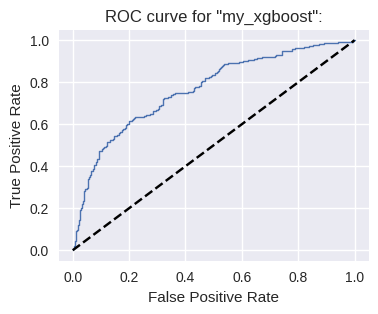

In [ ]:
# AUC-ROC

from sklearn.metrics import roc_curve
y_pred = my_xgboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 8
plt.title('ROC curve for "my_xgboost":')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Hyperparameter tuning: Grid Search and Cross validation
* create a default XGBoost classifier.
* create the Kfold object. You can use tratifiedKFold from sklearn.model_selection.
* create the grid search object. You can use RandomizedSearchCV from sklearn.model_selection.
* fit grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_grid = {"subsample":[0.25, 0.5, 0.75, 1],
              "colsample_bytree":[0.75, 1, 1.5, 2],
              "max_depth":[2, 4, 8, 6],
              "min_child_weight":[1, 2, 3, 5],
              "learning_rate":[0.1, 0.01, 0.08, 0.5]}


my_xgboost1 = RandomizedSearchCV(
            estimator = XGBClassifier(),
            param_distributions = hyperparameter_grid,
            cv = 3,
            n_iter=5,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5,
            return_train_score = True,
            random_state=42)

my_xgboost1.fit(X_train, y_train)
print(f'best hyperparameters in each part: {my_xgboost1.best_params_}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    

best hyperparameters in each part: {'subsample': 0.75, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [ ]:
#best hyperparameters in each part: {'subsample': 0.75, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 1}

new_model = XGBClassifier(subsample= 0.75, min_child_weight= 5, max_depth= 2, learning_rate= 0.1, colsample_bytree= 1)
new_model.fit(X_train, y_train)

y_pred_train = new_model.predict(X_train)
y_pred_test = new_model.predict(X_test)

### Assessing model performance using the best model from grid search
#### Print Train Accuracy, Test Accuracy and Classification Report.

In [ ]:
print('-'*35 + 'train' + '-'*35)
print(classification_report(y_pred_train, y_train))
print(f"accuracy : {accuracy_score(y_pred_train, y_train)}")
print('-'*35 + 'test' + '-'*35)
print(classification_report(y_pred_test, y_test))
print(f"accuracy : {accuracy_score(y_pred_test, y_test)}")

-----------------------------------train-----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       617
           1       0.66      0.73      0.69       371

    accuracy                           0.76       988
   macro avg       0.74      0.75      0.74       988
weighted avg       0.76      0.76      0.76       988

accuracy : 0.7550607287449392
-----------------------------------test-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       320
           1       0.61      0.70      0.65       212

    accuracy                           0.70       532
   macro avg       0.69      0.70      0.70       532
weighted avg       0.71      0.70      0.70       532

accuracy : 0.7011278195488722


### Create the feature importances plot, plot a decision tree from the booster.

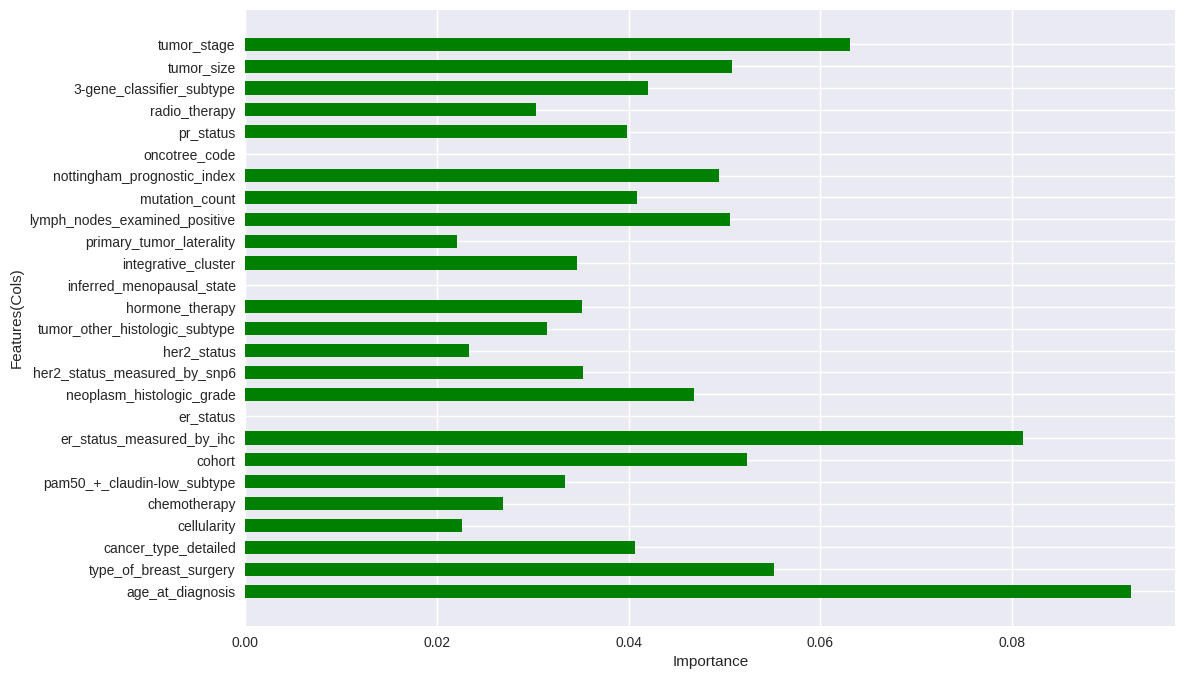

In [ ]:
#Create the feature importances plot

important_features = new_model.feature_importances_

cols = df.columns
featuresimportance = list(zip(cols, important_features))

fig = plt.figure(figsize=(12, 8))

plt.barh([x[0] for x in featuresimportance],[x[1] for x in featuresimportance], height=0.6, color = 'green')
plt.xlabel("Importance")
plt.ylabel("Features(Cols)")

plt.show()

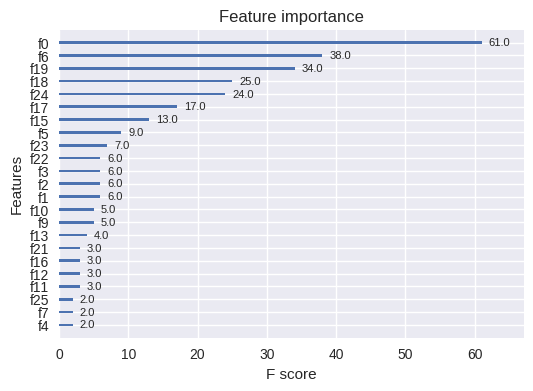

In [ ]:
xgb.plot_importance(new_model)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

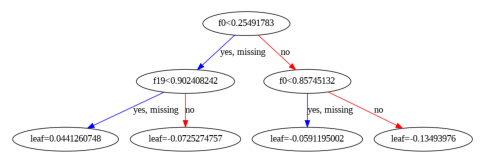

In [ ]:
#plot a decision tree from the booster.

from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(new_model)
plt.show()

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. You can implement your model and compare the results.

In [ ]:
X2 = df.drop(['cellularity', 'primary_tumor_laterality', 'overall_survival'], axis=1)
y2 = df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 1)

new_modeln = XGBClassifier(subsample= 0.75, min_child_weight= 5, max_depth= 3, learning_rate= 0.1, colsample_bytree= 1)
new_modeln.fit(X_train, y_train)

y_pred_train_n = new_modeln.predict(X_train)
y_pred_test_n = new_modeln.predict(X_test)

print('-'*35 + 'train' + '-'*35)
print(classification_report(y_pred_train_n, y_train))
print(f"accuracy : {accuracy_score(y_pred_train_n, y_train)}")
print('-'*35 + 'test' + '-'*35)
print(classification_report(y_pred_test_n, y_test))
print(f"accuracy : {accuracy_score(y_pred_test_n, y_test)}")

-----------------------------------train-----------------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       705
           1       0.70      0.77      0.74       435

    accuracy                           0.79      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.79      0.79      0.79      1140

accuracy : 0.7868421052631579
-----------------------------------test-----------------------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       224
           1       0.68      0.76      0.72       156

    accuracy                           0.75       380
   macro avg       0.75      0.75      0.75       380
weighted avg       0.76      0.75      0.75       380

accuracy : 0.7526315789473684


In [ ]:
# 5 darsad bhtar shod:)

## Comparison between XGBoost and Random Forest Classifier

Compare the results from these two models. How Would you rate each method in terms of its performance? What's the difference between these models? explain.

تقریبا عملکرد یکسانی داستند با این تفاوت که روش دوم فقط ۲ درصد بهتر عمل کرد

- Random Forest:

درخت‌های تصمیم را تولید می‌کند و پیش‌بینی‌های آن‌ها را به صورت موازی محاسبه می‌کند

easier to tune


- XGBoost:

یک مدل متوالی است، به این معنی که هر درخت بعدی به نتیجه آخرین درخت وابسته است. و به همین دلیل بصورت موازی قابل انجام نیست

برای داده هایی که فیپچر های کتگوریکال دارن مناسب تره

برای داده هایی که بالانس نیستن مناسب تره